<a href="https://colab.research.google.com/github/Salvatorecirri/Polythecnic-of-Milan_Projects/blob/main/ML_project_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLASSIFICATION CASE**

We started importing the libraries that we needed

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We read the csv file and saved it in a database named as "df"

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_project/tyres_train.csv')

We checked the size of the dataset

In [ ]:
df.shape

(3000, 16)

We checked the categorization of data items into the dataset

In [ ]:
df.dtypes


vulc               float64
perc_nat_rubber      int64
wiring_strength      int64
weather            float64
perc_imp           float64
temperature        float64
tread_type           int64
tyre_season          int64
elevation          float64
month                int64
tread_depth          int64
tyre_quality         int64
perc_exp_comp      float64
diameter           float64
add_layers           int64
failure              int64
dtype: object

In [ ]:
df.sample(10)

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
2529,16.576,28,1,0.30,0.01,-2.84,2,0,301.0,5,1,0,5.96,62.9,1,0
1454,18.046,27,1,0.16,0.01,-8.24,0,1,347.5,8,0,1,5.36,NaN,1,0
1219,16.098,28,1,0.62,0.05,2.96,3,0,391.5,6,2,0,6.34,NaN,1,1
840,18.508,34,0,0.30,0.01,-1.52,1,0,626.0,5,0,0,6.18,NaN,1,0
1014,17.816,24,1,0.16,0.01,-8.16,0,1,398.5,8,0,1,5.29,NaN,1,0
1639,19.382,30,1,0.21,0.00,4.32,2,0,659.5,11,2,0,6.00,NaN,1,1
2958,18.508,29,0,0.22,0.00,-1.28,4,1,607.0,11,2,0,6.21,51.4,1,0
412,17.842,28,1,0.37,0.02,-4.40,4,0,364.5,11,2,0,5.84,NaN,1,0
1881,17.864,36,0,0.14,0.00,1.64,0,0,477.0,4,1,0,6.26,NaN,1,0
2808,17.454,22,1,0.16,0.01,-6.92,0,1,224.0,8,0,1,5.26,NaN,1,0


We looked for missing values

In [ ]:
df.isnull().sum()

vulc                  0
perc_nat_rubber       0
wiring_strength       0
weather               0
perc_imp              0
temperature           0
tread_type            0
tyre_season           0
elevation             0
month                 0
tread_depth           0
tyre_quality          0
perc_exp_comp         0
diameter           2110
add_layers            0
failure               0
dtype: int64

We  decided to drop the feature "diameter" due to the number of missing values, that we considered too high to take into account a possible substitution.

In [ ]:
data=df.drop(["diameter"], axis=1)
data

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,17.818,29,2,0.39,0.01,7.28,1,1,287.5,10,1,1,5.68,1,1
2996,17.076,30,1,0.22,0.00,-1.44,1,1,152.5,6,1,0,5.81,1,1
2997,16.170,33,1,0.39,0.01,-3.44,1,0,235.0,8,3,1,5.57,0,0
2998,18.872,37,0,0.03,0.00,-0.76,4,0,290.0,11,0,0,5.89,0,0


In [ ]:
data.shape

(3000, 15)

We checked if the data was balanced or not

failure
0    1992
1    1008
dtype: int64


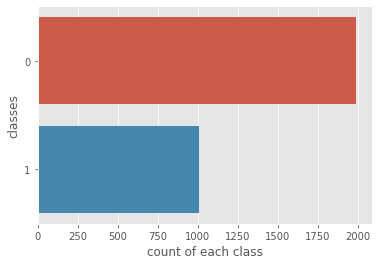

In [ ]:
print(data.groupby('failure').size())
%matplotlib inline
plt.style.use('ggplot')

sns.countplot(y=df.failure ,data=data)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

Due to the imbalance in our dataset, in which the number of 0 was significally higher than the number of 1 (almost twice), we decided to apply an oversampling in order to balance our dataset and increase the number of observations

In [ ]:
from sklearn.utils import resample

#Down-sample Majority Class
df_majority = data[data.failure==0]
df_minority = data[data.failure==1]

df_minority_oversampled = resample(df_minority,
                                   replace=True,
                                   n_samples=1992,
                                   random_state=321)

#Combine minority class with downsampled majority class
data = pd.concat([df_minority_oversampled, df_majority])

#Display new class counts
data.failure.value_counts()

1    1992
0    1992
Name: failure, dtype: int64

We reset the indexes of our new dataset

In [ ]:
data.reset_index(inplace=True, drop=True)

In [ ]:
data.shape

(3984, 15)

In [ ]:
data

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers,failure
0,17.830,24,1,0.37,0.02,-2.40,2,1,519.5,3,0,0,5.23,1,1
1,16.978,32,1,0.62,0.05,-1.08,4,1,475.5,1,1,0,5.82,2,1
2,18.152,30,0,0.62,0.05,1.76,2,0,266.0,10,0,0,6.17,1,1
3,18.442,41,0,0.39,0.01,-0.88,0,1,216.0,4,0,0,5.42,0,1
4,16.910,28,2,0.27,0.01,8.40,4,0,283.0,11,0,0,6.34,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,17.860,21,1,0.16,0.01,-6.48,0,1,336.5,8,0,1,5.85,1,0
3980,19.298,29,1,0.03,0.00,-1.00,2,1,167.5,8,0,0,5.82,2,0
3981,16.170,33,1,0.39,0.01,-3.44,1,0,235.0,8,3,1,5.57,0,0
3982,18.872,37,0,0.03,0.00,-0.76,4,0,290.0,11,0,0,5.89,0,0


We plotted both in a boxplot and a histogram our data to have an idea of the ranges assumed by the values of each feature and their distributions

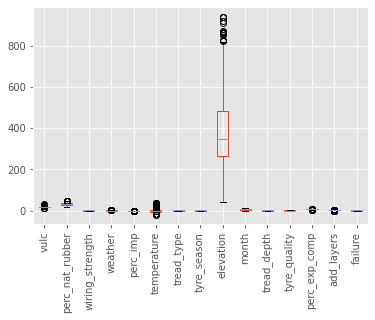

In [ ]:
%matplotlib inline
bp=data.boxplot(rot=90)


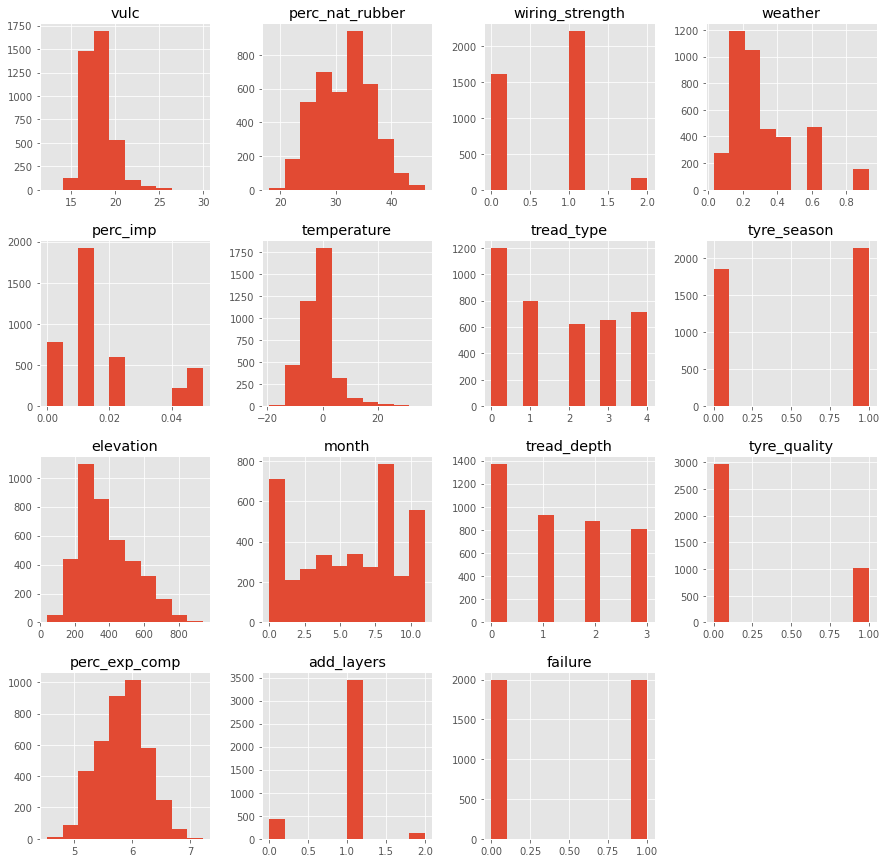

In [ ]:
data_hist=data.hist(layout=(4,4), figsize=(15,15))

## **Split categorical/numerical variables**

In [ ]:
df_categorical=data[['tread_type', 'tyre_season', 'month', 'tread_depth', 'wiring_strength', 'tyre_quality', 'add_layers']]
df_categorical

,tread_type,tyre_season,month,tread_depth,wiring_strength,tyre_quality,add_layers
0,2,1,3,0,1,0,1
1,4,1,1,1,1,0,2
2,2,0,10,0,0,0,1
3,0,1,4,0,0,0,0
4,4,0,11,0,2,0,1
...,...,...,...,...,...,...,...
3979,0,1,8,0,1,1,1
3980,2,1,8,0,1,0,2
3981,1,0,8,3,1,1,0
3982,4,0,11,0,0,0,0


In [ ]:
df_numerical=data[['vulc', 'perc_nat_rubber', 'weather', 'perc_imp','temperature', 'elevation', 'perc_exp_comp', 'failure']]
df_numerical

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,failure
0,17.830,24,0.37,0.02,-2.40,519.5,5.23,1
1,16.978,32,0.62,0.05,-1.08,475.5,5.82,1
2,18.152,30,0.62,0.05,1.76,266.0,6.17,1
3,18.442,41,0.39,0.01,-0.88,216.0,5.42,1
4,16.910,28,0.27,0.01,8.40,283.0,6.34,1
...,...,...,...,...,...,...,...,...
3979,17.860,21,0.16,0.01,-6.48,336.5,5.85,0
3980,19.298,29,0.03,0.00,-1.00,167.5,5.82,0
3981,16.170,33,0.39,0.01,-3.44,235.0,5.57,0
3982,18.872,37,0.03,0.00,-0.76,290.0,5.89,0


**CATEGORICAL DATA**

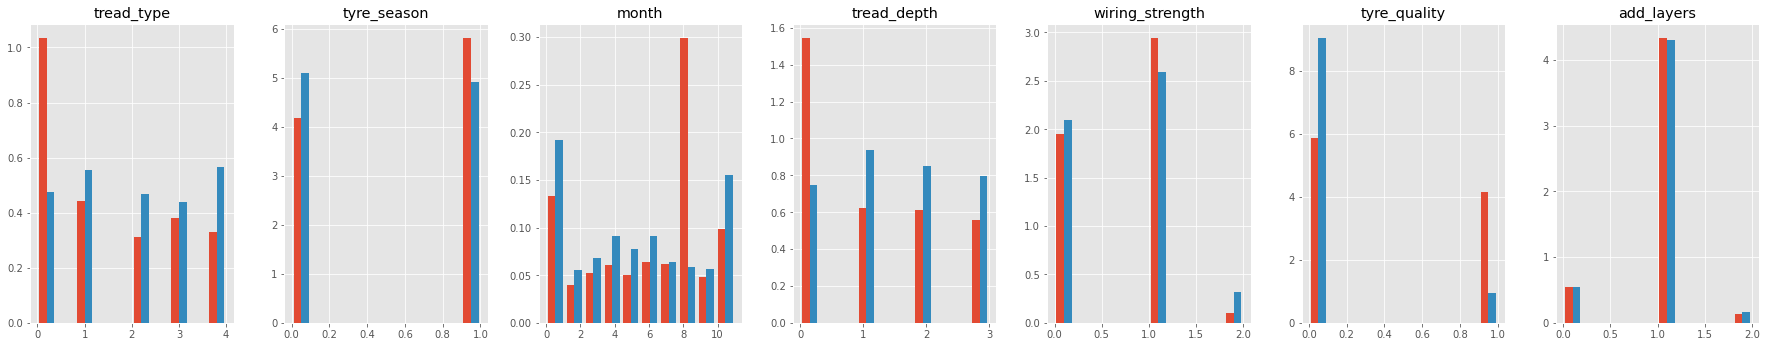

In [ ]:
df_0=df_categorical[data['failure']==0]
df_1=df_categorical[data['failure']==1]


fig, axes = plt.subplots(1, 7, figsize=[25,5])
axes = axes.flatten()
fig.tight_layout(pad=2)

i=0
for x in df_categorical.columns:
    plt.sca(axes[i])
    plt.hist([df_0[x], df_1[x]],density=True)
    plt.title(x)
    i+=1

plt.show()


After seen the distributions of the categorical features, we decided to exclude from our analysis the feature "add_layers" because the two distributions related to the observations with a target variable "failure=0" and the ones with a target variable "failure=1" were too similar and useless for our classification task. We also decided to drop the feature "tread_type" because during our analysis, we saw from the decision trees and the logistic regression, that it was one of the least correlated features to the target variable.

In [ ]:
selection_categorical=['tyre_season', 'month', 'tread_depth', 'wiring_strength', 'tyre_quality']
dummies = pd.get_dummies(df_categorical[selection_categorical], columns=['tyre_season', 'month', 'tread_depth', 'wiring_strength', 'tyre_quality'])
dummies

,tyre_season_0,tyre_season_1,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,...,month_11,tread_depth_0,tread_depth_1,tread_depth_2,tread_depth_3,wiring_strength_0,wiring_strength_1,wiring_strength_2,tyre_quality_0,tyre_quality_1
0,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3980,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3981,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3982,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0


**NUMERICAL DATA**

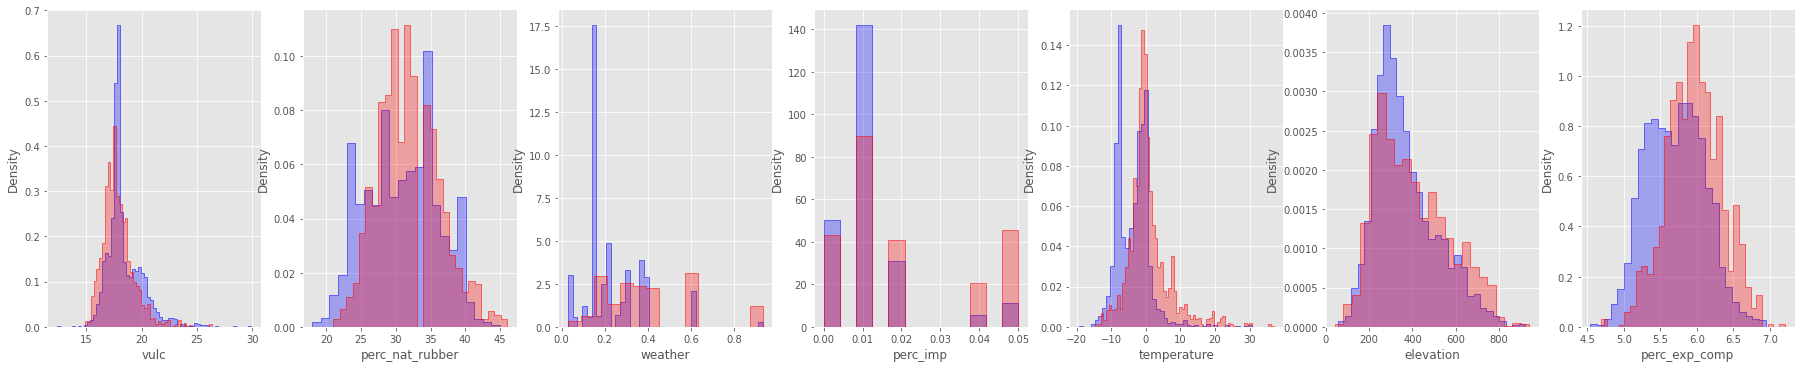

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


X0 = df_numerical[df_numerical['failure']==0]
X1 = df_numerical[df_numerical['failure']==1]

fig, axes = plt.subplots(ncols=7, nrows=1, figsize=(25,5))
fig.tight_layout()

for i, ax in zip(range(df_numerical.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()
#sistemare 'density' che viene sovrapposto alle linee

After seen the distributions, we decided to exclude from our analysis the feature "elevation" because the two distributions related to the observations with a target variable "failure=0" and the ones with a target variable "failure=1" were too similar and useless for our classification task

In [ ]:
df_numerical=df_numerical.drop(["elevation"], axis=1)
df_numerical

,vulc,perc_nat_rubber,weather,perc_imp,temperature,perc_exp_comp,failure
0,17.830,24,0.37,0.02,-2.40,5.23,1
1,16.978,32,0.62,0.05,-1.08,5.82,1
2,18.152,30,0.62,0.05,1.76,6.17,1
3,18.442,41,0.39,0.01,-0.88,5.42,1
4,16.910,28,0.27,0.01,8.40,6.34,1
...,...,...,...,...,...,...,...
3979,17.860,21,0.16,0.01,-6.48,5.85,0
3980,19.298,29,0.03,0.00,-1.00,5.82,0
3981,16.170,33,0.39,0.01,-3.44,5.57,0
3982,18.872,37,0.03,0.00,-0.76,5.89,0


##**Standardization**

We decided to apply the Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

independent_variables=df_numerical.iloc[:,:-1]

scaler = StandardScaler().fit(independent_variables)
scaled_data = pd.DataFrame(scaler.transform(independent_variables))
scaled_data.columns = independent_variables.columns
scaled_data.head()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,perc_exp_comp
0,-0.169425,-1.524787,0.303451,0.265042,-0.134306,-1.472388
1,-0.720198,0.129332,1.563926,2.212053,0.086797,-0.031172
2,0.038731,-0.284198,1.563926,2.212053,0.562502,0.823787
3,0.226200,1.990216,0.404289,-0.383961,0.120297,-1.008268
4,-0.764157,-0.697728,-0.200740,-0.383961,1.674713,1.239052


We saved the scaler

In [ ]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

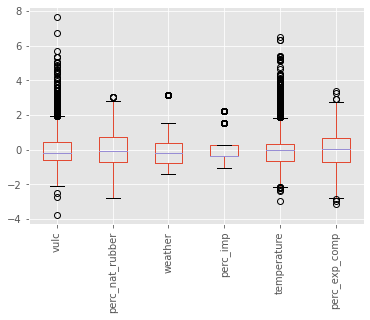

In [ ]:
%matplotlib inline
bp1=scaled_data.boxplot(rot=90)

We didn't consider the values of "vulc" and "temperature" as outliers because otherwise we will lose  too much information

In [ ]:
print(dummies.shape)
print(scaled_data.shape)

(3984, 23)
(3984, 6)


We finally concatenated the two databases

In [ ]:
X=pd.concat([dummies,scaled_data], axis = 1)
X.tail()

,tyre_season_0,tyre_season_1,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,...,wiring_strength_1,wiring_strength_2,tyre_quality_0,tyre_quality_1,vulc,perc_nat_rubber,weather,perc_imp,temperature,perc_exp_comp
3979,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,-0.150032,-2.145082,-0.755349,-0.383961,-0.817713,0.042110
3980,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0.779559,-0.490963,-1.410796,-1.032965,0.100197,-0.031172
3981,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,-1.242528,0.336097,0.404289,-0.383961,-0.308508,-0.641857
3982,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0.504173,1.163156,-1.410796,-1.032965,0.140397,0.139820
3983,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1.409199,0.336097,-1.259539,-1.032965,0.736703,0.408521


##**Separate train/test sets**

In [ ]:
y=data['failure']

In [ ]:
y.shape

(3984,)

We made the split into train and test set with stratified selection.

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.30,
                                                    stratify=y,
                                                    random_state= 321)

print(X_train.shape, X_test.shape)

(2788, 29) (1196, 29)


##**Models**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

**KNN**

We defined a function to carry out the GridSearch and find the best parameters

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,250,1)}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1      train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) ))
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
    print("")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [ ]:
hyperp_search(classifier,parameters)

f1_train: 0.744447 using {'n_neighbors': 111}
f1      train 0.751   test 0.748
precision  train 0.716   test 0.717

[[414 184]
 [131 467]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       598
           1       0.72      0.78      0.75       598

    accuracy                           0.74      1196
   macro avg       0.74      0.74      0.74      1196
weighted avg       0.74      0.74      0.74      1196



We also defined a function to plot the ROC curve of each model

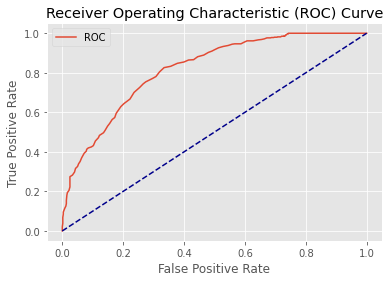

AUC: 0.82


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=111)

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test)

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

**CLASSIFICATION TREES**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'],
              'max_depth': [2, 3, 4, 5, 6, 7, 8],
              'min_samples_split': [5, 10, 15, 20],
              'min_samples_leaf': [4, 6, 8, 10]}

hyperp_search(classifier,parameters)

f1_train: 0.759669 using {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 5}
f1      train 0.801   test 0.763
precision  train 0.718   test 0.672

[[341 257]
 [ 71 527]]
              precision    recall  f1-score   support

           0       0.83      0.57      0.68       598
           1       0.67      0.88      0.76       598

    accuracy                           0.73      1196
   macro avg       0.75      0.73      0.72      1196
weighted avg       0.75      0.73      0.72      1196



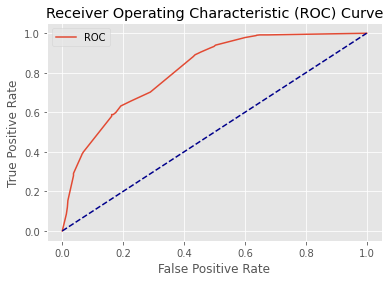

AUC: 0.81


In [ ]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4, min_samples_split=5)
fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)

We printed the tree to find the most influent variables, we saw that 'weather', 'month_8' and 'perc_nat_rubber' are the most influent varibales for our classification task

In [ ]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=4)
print(r)

|--- weather <= -0.73
|   |--- month_8 <= 0.50
|   |   |--- perc_nat_rubber <= 0.03
|   |   |   |--- weather <= -1.28
|   |   |   |   |--- temperature <= 0.10
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- temperature >  0.10
|   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- weather >  -1.28
|   |   |   |   |--- perc_nat_rubber <= -1.21
|   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |--- perc_nat_rubber >  -1.21
|   |   |   |   |   |--- truncated branch of depth 2
|   |   |--- perc_nat_rubber >  0.03
|   |   |   |--- weather <= -1.34
|   |   |   |   |--- class: 0
|   |   |   |--- weather >  -1.34
|   |   |   |   |--- perc_exp_comp <= -0.70
|   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |--- perc_exp_comp >  -0.70
|   |   |   |   |   |--- truncated branch of depth 2
|   |--- month_8 >  0.50
|   |   |--- perc_nat_rubber <= -0.39
|   |   |   |--- temperature <= -1.44
|   |   |   |   |--- class: 0
|   |   |   |--- temp

We printed also the image of the tree

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model_tree, out_file='decision_tree.dot', feature_names = X_test.columns.tolist())
!dot -Tpng decision_tree.dot -o decision_tree.png -Gdpi=600
from IPython.display import Image
Image(filename = 'decision_tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.735098 to fit


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("f1_score_test: ", f1_score(y_test, y_pred))
print('***RESULTS ON TRAIN SET***')
print("f1_score_test: ", f1_score(y_train, y_pred_train))

***RESULTS ON TEST SET***
f1_score_test:  0.696362286562732
***RESULTS ON TRAIN SET***
f1_score_test:  0.7177368086458995


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.53      0.61       598
           1       0.63      0.78      0.70       598

    accuracy                           0.66      1196
   macro avg       0.67      0.66      0.65      1196
weighted avg       0.67      0.66      0.65      1196



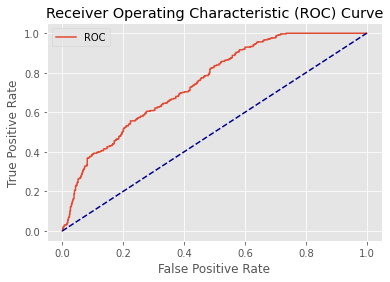

AUC: 0.75


In [ ]:
y_probs = model.predict_proba(X_test)
fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000] }

hyperp_search(classifier,parameters)

f1_train: 0.744912 using {'C': 0.1, 'max_iter': 1000}
f1      train 0.748   test 0.716
precision  train 0.737   test 0.707

[[418 180]
 [164 434]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       598
           1       0.71      0.73      0.72       598

    accuracy                           0.71      1196
   macro avg       0.71      0.71      0.71      1196
weighted avg       0.71      0.71      0.71      1196



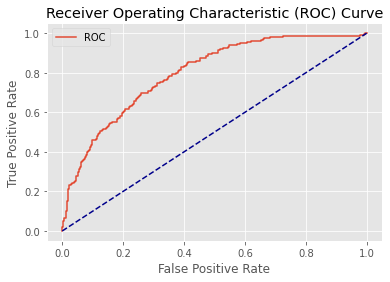

AUC: 0.80


In [ ]:
model_log = LogisticRegression(C=0.1, max_iter=1000)
fpr4,tpr4=roc(model_log,X_train,y_train,X_test,y_test)

We plotted the correlation between variables and the target variable: the most positively correlated variable is "weather", the most negatively correlated is "month_8"

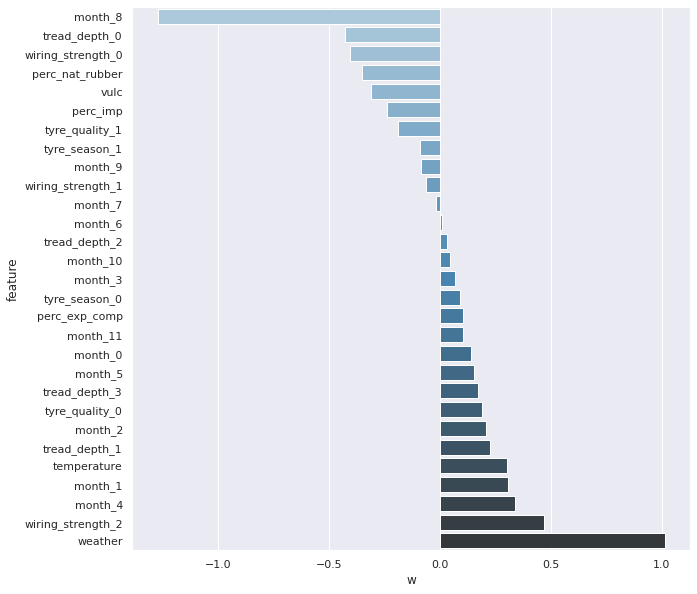

In [ ]:
model_log.fit(X_train,y_train)

coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=model_log.coef_[0]

coeff.sort_values(by=['w'], inplace=True)

sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
sns.set(rc={'figure.figsize':(6,4)})

**SVM**

In [ ]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.001,  0.01, 0.1, 1], "gamma":['scale']}

hyperp_search(classifier,parameters)

f1_train: 0.757336 using {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
f1      train 0.805   test 0.774
precision  train 0.783   test 0.760

[[449 149]
 [126 472]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       598
           1       0.76      0.79      0.77       598

    accuracy                           0.77      1196
   macro avg       0.77      0.77      0.77      1196
weighted avg       0.77      0.77      0.77      1196



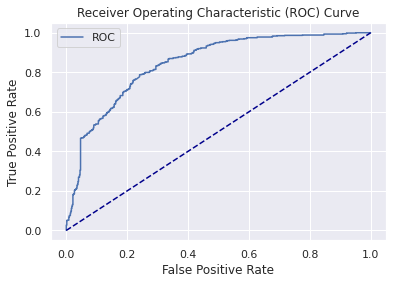

AUC: 0.85


In [ ]:
model_svc = SVC(C=1, kernel='rbf', gamma='scale', probability=True)
fpr5,tpr5=roc(model_svc,X_train,y_train,X_test,y_test)

**NEURAL NETWORK**

In [ ]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(5, 3, 2), (6, 3, 1)],  "max_iter": [1000, 2000], "alpha": [0.03]}

hyperp_search(classifier,parameters)

f1_train: 0.761790 using {'alpha': 0.03, 'hidden_layer_sizes': (5, 3, 2), 'max_iter': 2000}
f1      train 0.783   test 0.742
precision  train 0.776   test 0.748

[[450 148]
 [158 440]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       598
           1       0.75      0.74      0.74       598

    accuracy                           0.74      1196
   macro avg       0.74      0.74      0.74      1196
weighted avg       0.74      0.74      0.74      1196



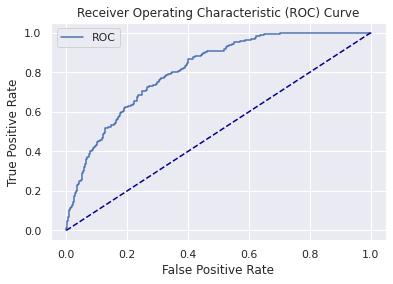

AUC: 0.81


In [ ]:
model_MLP=MLPClassifier(hidden_layer_sizes=(5, 3, 2), alpha=0.03, max_iter=2000)
fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier= RandomForestClassifier()
parameters = {'n_estimators' : [10, 50, 100, 200],
             'criterion': ['entropy', 'gini'],
             'max_depth' : [1,2,3],
             'min_samples_split' : [4,5,10],
             'min_samples_leaf' : [4,5,10]
             }

hyperp_search(classifier,parameters)

f1_train: 0.757541 using {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 50}
f1      train 0.761   test 0.755
precision  train 0.673   test 0.666

[[336 262]
 [ 76 522]]
              precision    recall  f1-score   support

           0       0.82      0.56      0.67       598
           1       0.67      0.87      0.76       598

    accuracy                           0.72      1196
   macro avg       0.74      0.72      0.71      1196
weighted avg       0.74      0.72      0.71      1196



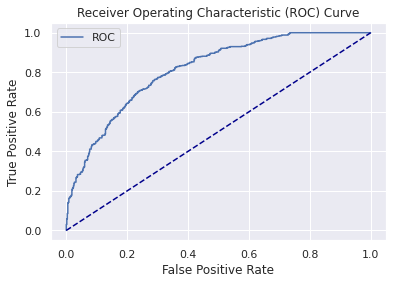

AUC: 0.81


In [ ]:
model_rf = RandomForestClassifier(criterion= 'entropy', max_depth = 3, min_samples_leaf = 10, min_samples_split = 4, n_estimators = 50)
fpr7,tpr7=roc(model_rf,X_train,y_train,X_test,y_test)

**ADABOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

classifier = AdaBoostClassifier()
parameters =  {'n_estimators' : [2, 6, 10, 20, 30],'learning_rate' : [0.001, 0.01, 0.1, 1, 10]}
hyperp_search(classifier,parameters)

f1_train: 0.751457 using {'learning_rate': 1, 'n_estimators': 6}
f1      train 0.751   test 0.751
precision  train 0.698   test 0.695

[[384 214]
 [110 488]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       598
           1       0.70      0.82      0.75       598

    accuracy                           0.73      1196
   macro avg       0.74      0.73      0.73      1196
weighted avg       0.74      0.73      0.73      1196



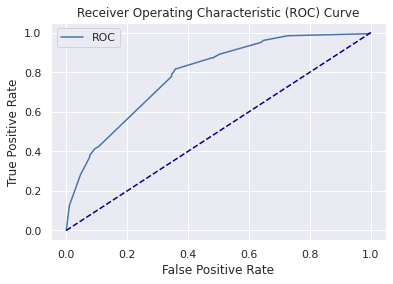

AUC: 0.79


In [ ]:
model_ad = AdaBoostClassifier(learning_rate=1, n_estimators=6)
fpr8,tpr8=roc(model_ad,X_train,y_train,X_test,y_test)

We finally plotted of all the ROC curves: the best model in terms of AUC is **SVM**

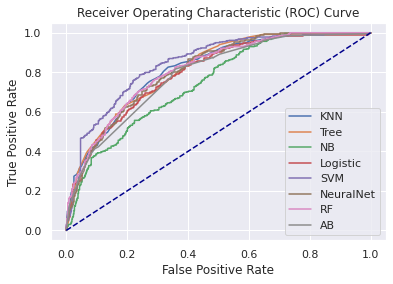

In [ ]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot(fpr7, tpr7, label= "RF")
plt.plot(fpr8, tpr8, label= "AB")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

##**FINAL CHOICE**

We finally chose the **SVM MODEL**, because it has the best result among all the models in terms of F1-score.

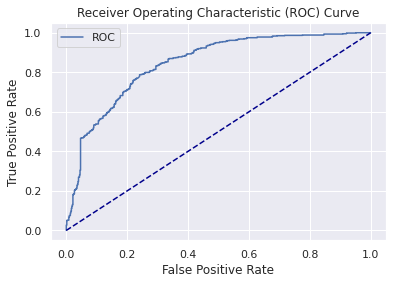

AUC: 0.85


In [ ]:
model_svc = SVC(C=1, kernel='rbf', gamma='scale', probability=True)
fpr5,tpr5=roc(model_svc,X_train,y_train,X_test,y_test)

We saved our model for replicability issues

In [ ]:
pickle.dump(model_svc, open('chosen_SVM_model.pkl', 'wb'))